# Contour-based filtering

In [1]:
import matlab.engine
import numpy as np
from numpy import pi as pi
import seaborn as sns
import matplotlib.pyplot as plt
import cmocean
from benchmark_demo.utilstf import *
from benchmark_demo.SignalBank import SignalBank
from benchmark_demo.benchmark_utils import MatlabInterface
from methods.method_contour_filtering import NewMethod
import sys
import os

In [2]:
# A test for new methods
# np.random.seed(0) 

# signal parameters
SNRin = 30
N = 2**10
Nsub=N//2
sbank = SignalBank(N=N, return_signal=True)
tmin = sbank.tmin
tmax = sbank.tmax
# s = sbank.signal_cos_chirp()
# s = sbank.signal_mc_multi_linear()
# s = sbank.signal_mc_cos_plus_tone()
# s = sbank.signal_mc_modulated_tones()
s = sbank.signal_mc_synthetic_mixture()
# s = sbank.signal_mc_synthetic_mixture_4()
# s = sbank.signal_mc_on_off_2()
s = sbank.signal_mc_triple_impulse()
signal, noise = add_snr(s,SNRin)
# signal = s + noise*np.sqrt(N/Nsub)
#
print(s.total_comps)
print(signal.total_comps)

snr_out:30.0
3
3


In [3]:
Nfft = 2*N
g,_ = get_round_window(Nfft)
S, F, stft_padded, Npad = get_spectrogram(s, window = g)

methodml = NewMethod()
funa = methodml.method
# signal_r = contour_filtering(s, NumC, Ks, a)
signal_output = funa(signal,[],75,[])

S_output, F_output, _, _ = get_spectrogram(signal_output, window = g)

print(10*np.log10((np.sum(s[tmin:tmax]**2))/(np.sum((s[tmin:tmax]-signal_output[tmin:tmax])**2))))

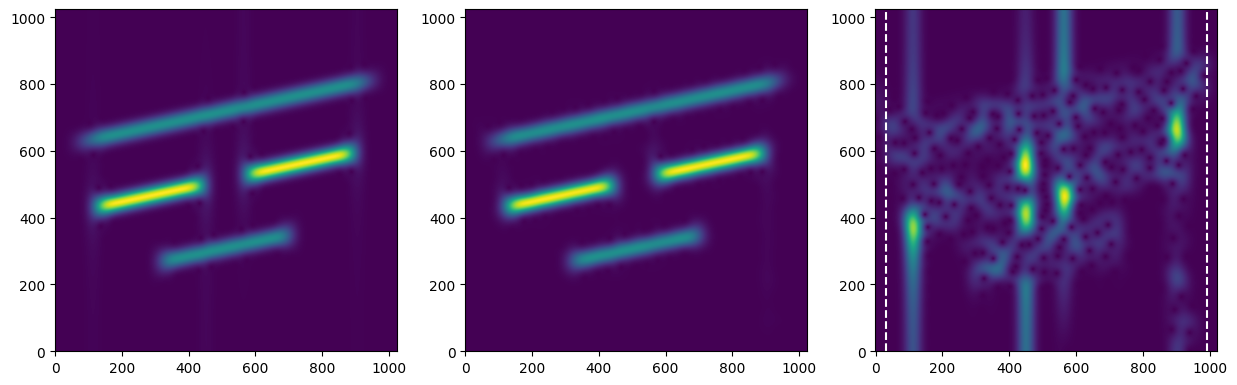

In [ ]:
fig, ax = plt.subplots(1,3,figsize = (15,5))
ax[0].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
ax[1].imshow(abs(F_output), origin='lower')#, cmap=cmocean.cm.deep)
ax[2].imshow(abs(F_output-F), origin='lower')#, cmap=cmocean.cm.deep)
ax[2].plot([tmin, tmin], [0, Nfft//2],'w--')
ax[2].plot([tmax, tmax], [0, Nfft//2],'w--')
plt.show()
